In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = df.iloc[:,:7]


In [6]:
y= df.iloc[:,7]


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score

In [9]:
model = LogisticRegression()

In [10]:
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
model.coef_

array([[ 0.00102982,  0.00453546, -0.21666626,  0.42441353,  0.05623563,
        -0.27695058, -0.0078621 ]])

In [12]:
model.intercept_

array([0.0038966])

In [13]:
ypred = model.predict(x_test)

In [14]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
y_pred_probs = model.predict_proba(x_test)
y_pred_probs

array([[0.93744212, 0.06255788],
       [0.67199068, 0.32800932],
       [0.99149545, 0.00850455],
       ...,
       [0.99216232, 0.00783768],
       [0.94365252, 0.05634748],
       [0.99442535, 0.00557465]])

In [16]:
confusion_matrix(y_test,ypred)

array([[7157,  168],
       [ 606,  307]], dtype=int64)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

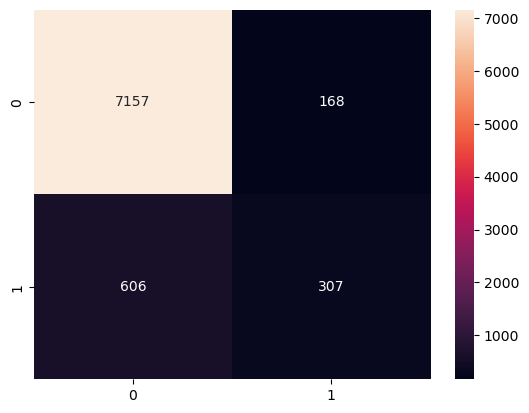

In [18]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt="g")


In [19]:
accuracy_score(y_test,ypred)

0.9060451565914057

In [20]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7325
           1       0.65      0.34      0.44       913

    accuracy                           0.91      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



In [21]:
fpr,tpr,_ = roc_curve(y_test,y_pred_probs[:,1])

In [22]:
fpr

array([0.00000000e+00, 0.00000000e+00, 1.36518771e-04, ...,
       9.99317406e-01, 9.99590444e-01, 1.00000000e+00])

In [23]:
tpr

array([0.        , 0.00109529, 0.00109529, ..., 1.        , 1.        ,
       1.        ])

In [24]:
_

array([1.99995812, 0.99995812, 0.99995303, ..., 0.00528311, 0.00527551,
       0.00511785])

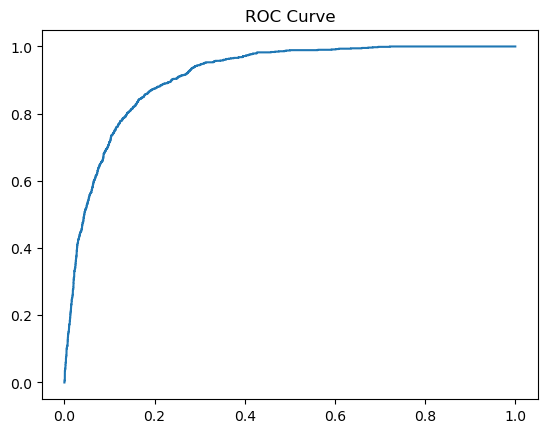

In [25]:
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.show()

In [26]:
roc_auc_score(y_test,y_pred_probs[:,1])

0.9121247509429588